In [1]:
library(dplyr)
library(stringr)
library(lubridate)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Etc/UCT’ (or equivalent)”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
df <- read.csv("../Data/data.csv")

In [3]:
df

X,starttime,conversation_id,issue,referred_by,media_referral
<int>,<chr>,<int>,<chr>,<chr>,<chr>
0,2021-11-30 05:00:00,1000358,,,
1,2020-02-03 21:00:16,218912,Anxiety/Stress|Depressed,Google search,
2,2021-07-15 18:42:11,804970,Anxiety/Stress|Depressed|Suicide,,
3,2019-08-09 20:09:14,102581,Suicide,,
4,2021-03-29 03:59:37,665289,Depressed|Self Harm|Substance Abuse|Suicide,,
5,2019-08-01 18:14:46,99424,Suicide,,
6,2021-08-26 19:49:35,862300,Depressed|Isolated|Relationship|Suicide,,
7,2021-09-29 20:19:47,910212,Anxiety/Stress|Relationship,,
8,2022-01-18 08:39:35,1079858,Bully|Suicide,,


In [4]:
table(df$issue)


                                                                                                                                                                           
                                                                                                                                                                     19941 
                                                                                                                                                                 3rd Party 
                                                                                                                                                                     17346 
                                                                                                                                                              Abuse, child 
                                                                                                                                           

In [5]:
topics <- c("3rd Party", "Abuse, child", "Abuse, domestic", "Abuse, other", "Abuse, unspecified","Abuse, sexual"
           ,"Anxiety/Stress","Other","Depressed","Relationship","Substance Abuse","Suicide"
           ,"Isolated","Bully","Eating Body Image","Gender/Sexual Identity","Grief"
           ,"COVID-19","Self Harm","Testing","Prank","DNE","Abuse, physical", "Abuse, emotional")

for (topic in topics){
    df[topic] <- ifelse(grepl(topic, df$issue), 1, 0)
}


In [6]:
head(df)

,X,starttime,conversation_id,issue,referred_by,media_referral,3rd Party,"Abuse, child","Abuse, domestic","Abuse, other",⋯,Eating Body Image,Gender/Sexual Identity,Grief,COVID-19,Self Harm,Testing,Prank,DNE,"Abuse, physical","Abuse, emotional"
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,2021-11-30 05:00:00,1000358,,,,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,1,2020-02-03 21:00:16,218912,Anxiety/Stress|Depressed,Google search,,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,2,2021-07-15 18:42:11,804970,Anxiety/Stress|Depressed|Suicide,,,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,3,2019-08-09 20:09:14,102581,Suicide,,,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,4,2021-03-29 03:59:37,665289,Depressed|Self Harm|Substance Abuse|Suicide,,,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
6,5,2019-08-01 18:14:46,99424,Suicide,,,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [7]:
df_chunks <- df %>% mutate(starttime = as.POSIXct(starttime, format="%Y-%m-%d %H:%M:%S",tz="GMT")) %>% select(starttime)

In [8]:
min(df_chunks$starttime)
max(df_chunks$starttime)

[1] "2018-02-12 23:44:48 GMT"

[1] "2022-05-15 19:21:51 GMT"

In [9]:
df_chunks <- df_chunks[order(df_chunks$starttime),]
#df_chunks <- rev(df_chunks)
#df_chunks <- as.data.frame(df_chunks)
#names(df_chunks)[names(df_chunks) == "df_chunks"] <-"starttime"

In [10]:
head(df_chunks)
tail(df_chunks)

[1] "2018-02-12 23:44:48 GMT" "2018-02-20 16:14:41 GMT"
[3] "2018-03-20 19:13:25 GMT" "2018-04-11 20:21:05 GMT"
[5] "2018-04-13 13:38:13 GMT" "2018-04-13 14:12:02 GMT"

[1] "2022-05-15 18:53:02 GMT" "2022-05-15 18:53:50 GMT"
[3] "2022-05-15 18:55:07 GMT" "2022-05-15 18:58:41 GMT"
[5] "2022-05-15 19:07:06 GMT" "2022-05-15 19:21:51 GMT"

In [11]:
df_chunks_cut <- cut(df_chunks, 'hour')
df_freq <- table(df_chunks_cut)


In [12]:
df_plot <- as.data.frame(df_freq)
df_plot$df_chunks_cut <- as.Date(df_plot$df_chunks_cut)

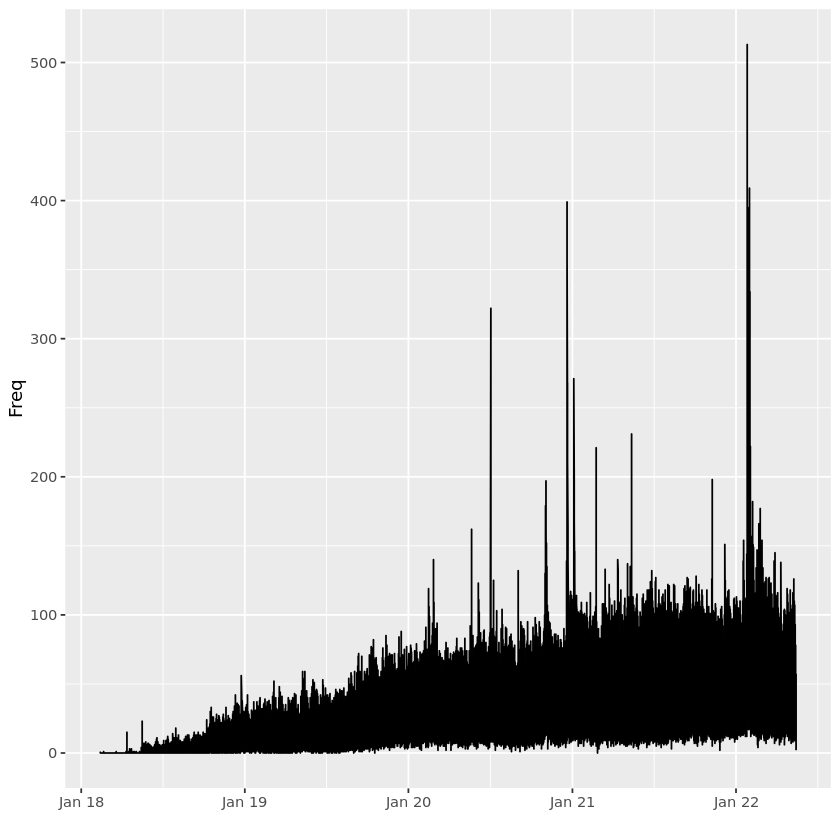

In [13]:
ggplot(df_plot, aes(x=df_chunks_cut, y=Freq, group = 1)) +
geom_line() + scale_x_date(date_labels = "%b %y") +xlab("")

In [14]:
for (topic in topics){
    print(topic)
    print(sum(df[topic]))
}

[1] "3rd Party"
[1] 17346
[1] "Abuse, child"
[1] 3451
[1] "Abuse, domestic"
[1] 4622
[1] "Abuse, other"
[1] 4020
[1] "Abuse, unspecified"
[1] 1919
[1] "Abuse, sexual"
[1] 22569
[1] "Anxiety/Stress"
[1] 258977
[1] "Other"
[1] 140263
[1] "Depressed"
[1] 271818
[1] "Relationship"
[1] 213955
[1] "Substance Abuse"
[1] 18547
[1] "Suicide"
[1] 298769
[1] "Isolated"
[1] 136617
[1] "Bully"
[1] 17435
[1] "Eating Body Image"
[1] 30084
[1] "Gender/Sexual Identity"
[1] 10954
[1] "Grief"
[1] 36364
[1] "COVID-19"
[1] 28096
[1] "Self Harm"
[1] 123327
[1] "Testing"
[1] 7893
[1] "Prank"
[1] 2437
[1] "DNE"
[1] 227202
[1] "Abuse, physical"
[1] 10232
[1] "Abuse, emotional"
[1] 16835


In [15]:
to_save <- as.data.frame(df_freq)
names(to_save)[names(to_save) == "df_chunks_cut"] <-"starttime"
saveRDS(to_save, file = "../Data/full_hourly_chunks.rds")

In [18]:
sum(is.na(to_save))

[1] 0